# Linear and Ridge Regression
This notebook explores basic linear regression and regularization (Ridge) using synthetic data.  
It demonstrates how bias–variance tradeoff works and how model complexity affects performance.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [183]:
np.random.seed(30)
x = np.arange(1, 15, 0.5)
fx = x + np.random.uniform(-1, 1, size=x.shape)


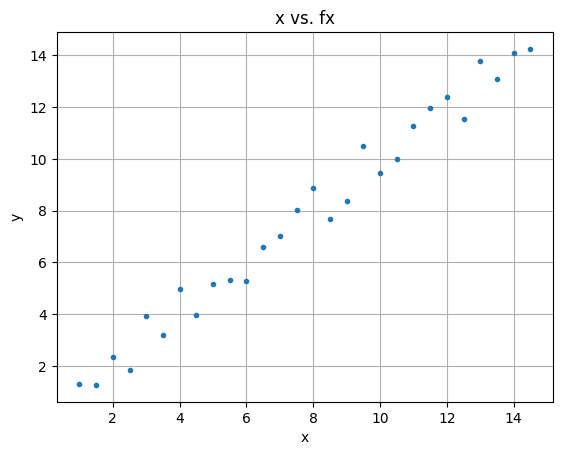

In [184]:
plt.plot(x, fx, '.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs. fx")
plt.grid(True)


In [185]:
x.shape, fx.shape


((28,), (28,))

In [186]:
X = x.reshape(-1,1)
Y= fx.reshape(-1,1)

In [187]:
X.shape, Y.shape

((28, 1), (28, 1))

## Linear Regression (sklearn)
We start with a basic linear regression model using scikit-learn’s `LinearRegression`.


In [188]:
model = LinearRegression(fit_intercept=True)
model_fit = model.fit(X, Y)

In [189]:
model_fit.coef_[0][0], model_fit.intercept_[0]

(np.float64(0.9903298415972086), np.float64(0.09191876242212604))

In [190]:
y_pred = lambda x: model_fit.coef_[0][0]*x + model_fit.intercept_[0]

Text(0, 0.5, 'y')

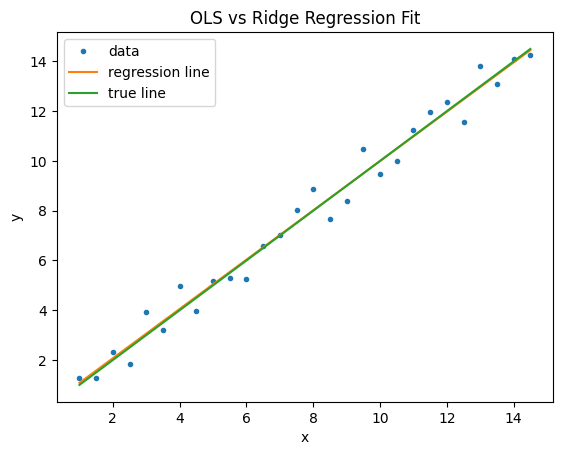

In [191]:
plt.plot(x, fx, '.', label = "data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, x, label = "true line")
plt.legend()
plt.title("OLS vs Ridge Regression Fit")
plt.xlabel("x")
plt.ylabel("y")

## Manual Linear Regression Implementation
Below is a custom implementation of linear regression using the normal equation.  
This section replicates what sklearn does internally to show how parameters are estimated.


In [192]:
class LR():
    def __init__(self) -> None:
        self.params = None
    def fit(self, X, Y):
        r, _ = X.shape 
        X = np.hstack([np.ones((r, 1)), X]) 
        self.params = np.linalg.pinv(X.T @ X) @ X.T @ Y

        return self
    
    def predict(self, X):
        r, _ = X.shape 
        X = np.hstack([np.ones((r, 1)), X])

        return X @ self.params
    def score(self, X, Y):
        y_pred = self.predict(X)
        SYY= np.sum( (Y-np.mean(Y))**2)
        RSS=np.sum( (Y-y_pred)**2)

        return 1-RSS/SYY        

In [193]:
model2 = LR()
model2_fit = model2.fit(X, Y)


In [194]:
model2_fit.params

array([[0.09191876],
       [0.99032984]])

In [195]:
model2_fit.predict(np.array([[1]]))

array([[1.0822486]])

In [196]:
model2_fit.score(X,Y)

np.float64(0.9797197038489864)

In [197]:
SYY = np.sum( (Y - np.mean(Y))**2 )
SYY

np.float64(457.2318185788399)

In [198]:
RSS = np.sum( (Y - model_fit.predict(X))**2 )
RSS

np.float64(9.272796690445373)

In [199]:
model_fit.predict(X)[0:5], Y[0:5]

(array([[1.0822486 ],
        [1.57741352],
        [2.07257845],
        [2.56774337],
        [3.06290829]]),
 array([[1.28828707],
        [1.26149698],
        [2.32609581],
        [1.82730145],
        [3.92521563]]))

## Ridge Regression
We now apply Ridge regression to see how regularization (α) affects the coefficients and the fitted line.


In [200]:
from sklearn.linear_model import Ridge

In [201]:
model3 = Ridge(alpha=1)
model3_fit = model3.fit(X, Y)

In [202]:
model3_fit.coef_, model3_fit.intercept_

(array([0.98816637]), array([0.10868568]))

In [203]:
model_fit.coef_, model_fit.intercept_

(array([[0.99032984]]), array([0.09191876]))

In [204]:
y_pred_ridge = lambda x: model3_fit.coef_[0]*x + model3_fit.intercept_[0]

Text(0, 0.5, 'y')

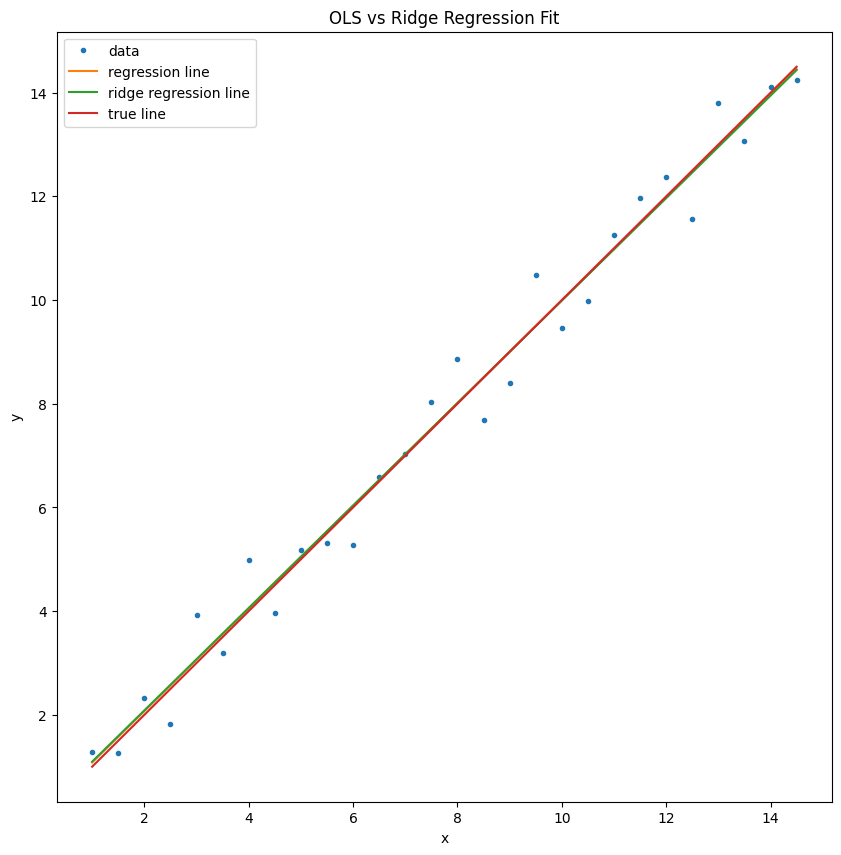

In [205]:
plt.figure(figsize=(10, 10))
plt.plot(x, fx, '.', label="data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, y_pred_ridge(x), label="ridge regression line")
plt.plot(x, x, label="true line")
plt.legend()
plt.title("OLS vs Ridge Regression Fit")
plt.xlabel("x")
plt.ylabel("y")

## Comparing Regularization Strength
As α increases, Ridge regression penalizes large coefficients more strongly,  
leading to smoother fits that trade variance for bias.


In [206]:
model4 = Ridge(alpha=50)
model4_fit = model4.fit(X, Y)

In [207]:
model4_fit.coef_, model4_fit.intercept_

(array([0.89261599]), array([0.84920108]))

In [208]:
y_pred_more_ridge = lambda x: model4_fit.coef_[0]*x + model4_fit.intercept_

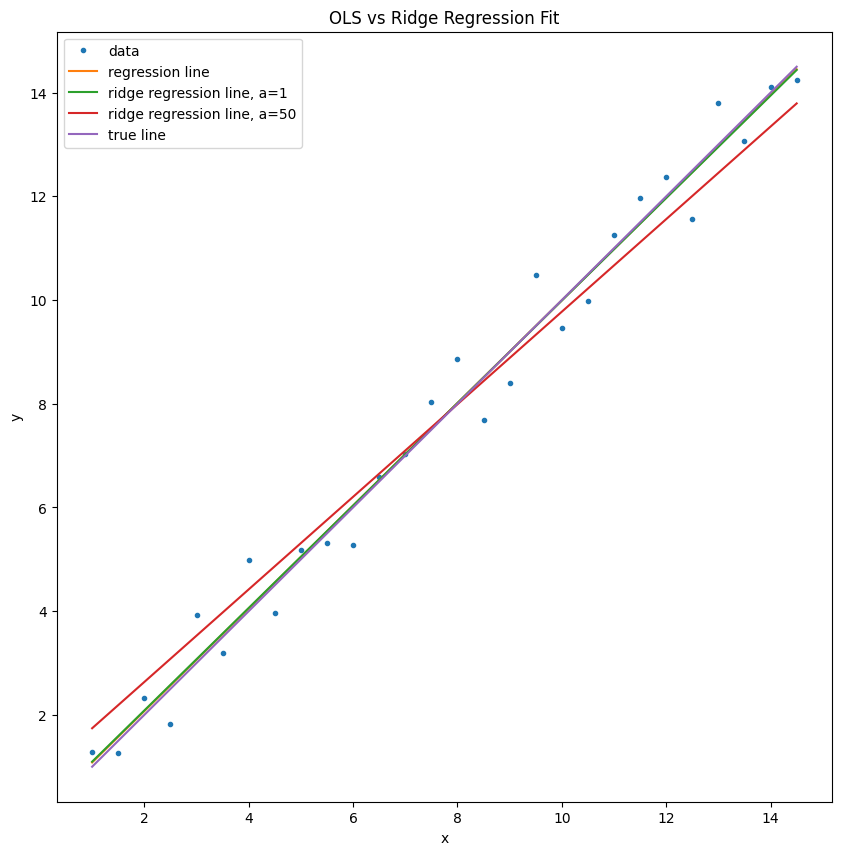

In [210]:
plt.figure(figsize=(10, 10))
plt.plot(x, fx, '.', label="data")
plt.plot(x, y_pred(x), label="regression line")
plt.plot(x, y_pred_ridge(x), label="ridge regression line, a=1")
plt.plot(x, y_pred_more_ridge(x), label="ridge regression line, a=50")
plt.plot(x, x, label="true line")
plt.legend()
plt.title("OLS vs Ridge Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("ridge_comparison.png", dpi=200, bbox_inches="tight")


## Takeaways
- Ridge regression shrinks coefficients and reduces overfitting.  
- Higher α → smoother line but more bias.  
- This notebook demonstrates how regularization controls model complexity.
